<a href="https://colab.research.google.com/github/tomektomeknyc/machinelearning/blob/main/Arima3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2023-07-18 12:56:14--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  10.7MB/s    in 2.3s    

2023-07-18 12:56:17 (10.7 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.7 MB/s eta 0:00:00


In [3]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [6]:
goog = df[df['Name'] == 'GOOG']['Close']
# goog = np.log(df[df['Name'] == 'GOOG']['Close'])

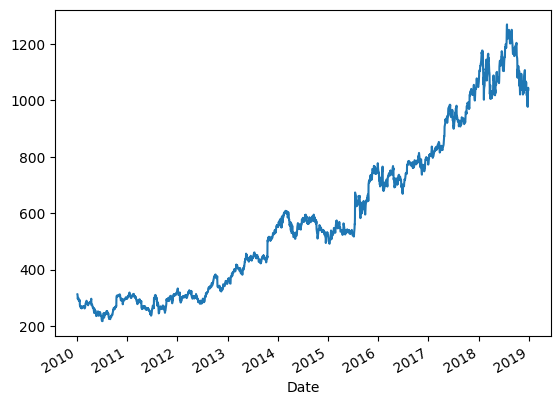

In [7]:
goog.plot();

In [8]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [9]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.60 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.84 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.18 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 5.098 seconds


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Tue, 18 Jul 2023   AIC                          16264.983
Time:                        13:06:05   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [12]:
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start=d, end=-1)
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(fulldata.index, fulldata, label='data')
  ax.plot(train.index[d:], train_pred, label='fitted')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
  ax.legend();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


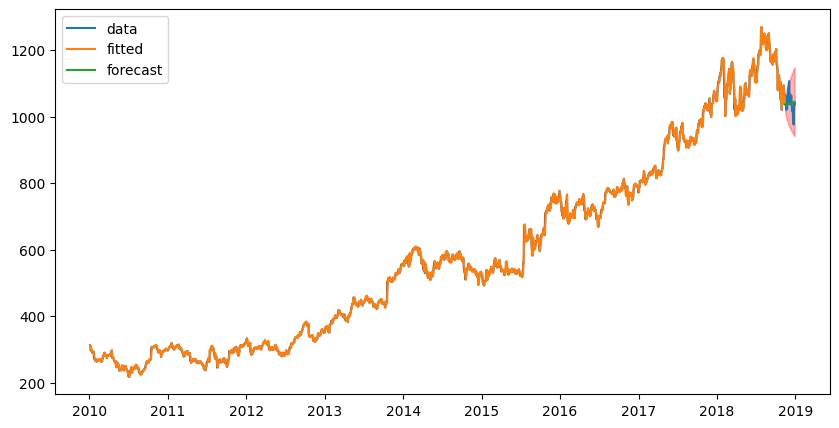

In [13]:
plot_result(model, goog, train, test)

In [14]:
def plot_test(model, test):
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(test.index, test, label='true')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha=0.3)
  ax.legend();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


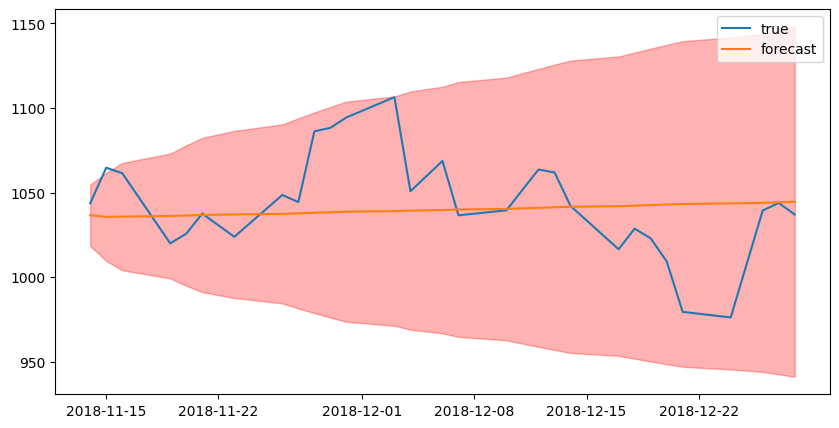

In [15]:
plot_test(model, test)

In [16]:
def rmse(y, t):
  return np.sqrt(np.mean((t - y)**2))

In [17]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: nan
RMSE Naive: 30.029502477261467


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


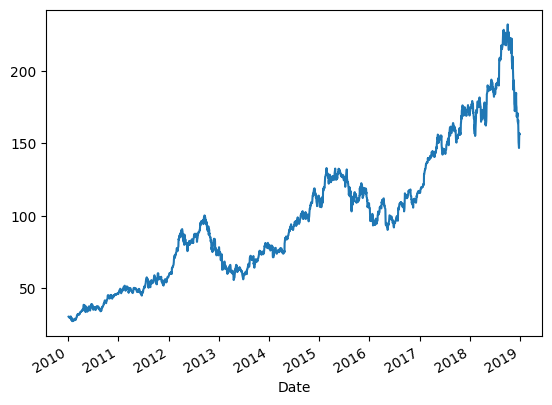

In [18]:
aapl = df[df['Name'] == 'AAPL']['Close']
# aapl = np.log(df[df['Name'] == 'AAPL']['Close'])
aapl.plot();

In [19]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

In [20]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=0.87 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=0.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=1.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=1.45 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.28 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Tue, 18 Jul 2023   AIC                           8570.296
Time:                        13:09:12   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


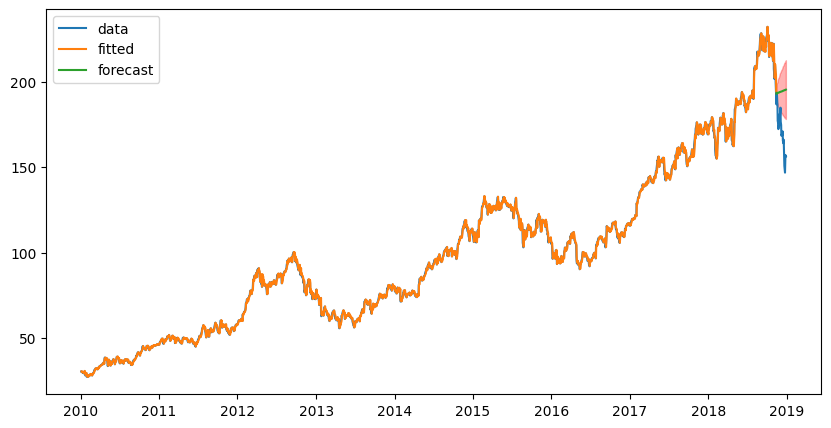

In [22]:
plot_result(model, aapl, train, test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


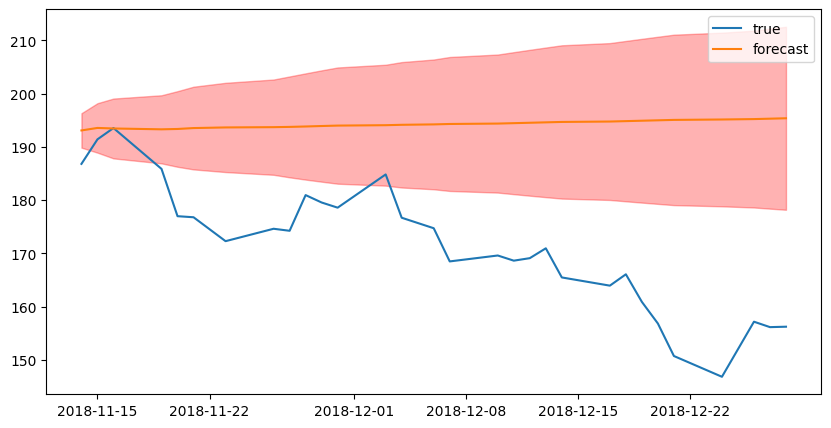

In [23]:
plot_test(model, test)

In [24]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: nan
RMSE Naive: 24.02712058667382


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


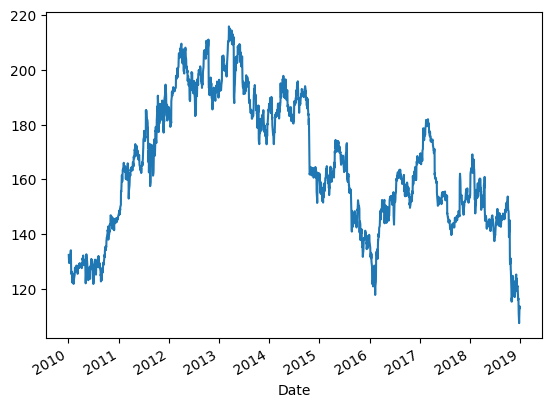

In [25]:
ibm = df[df['Name'] == 'IBM']['Close']
# ibm = np.log(df[df['Name'] == 'IBM']['Close'])
ibm.plot();

In [26]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

In [27]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.548 seconds


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Tue, 18 Jul 2023   AIC                           9434.097
Time:                        13:11:05   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


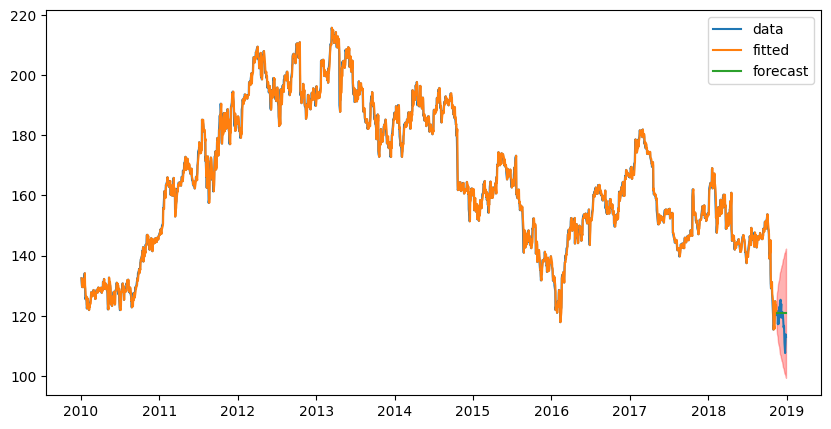

In [29]:
plot_result(model, ibm, train, test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


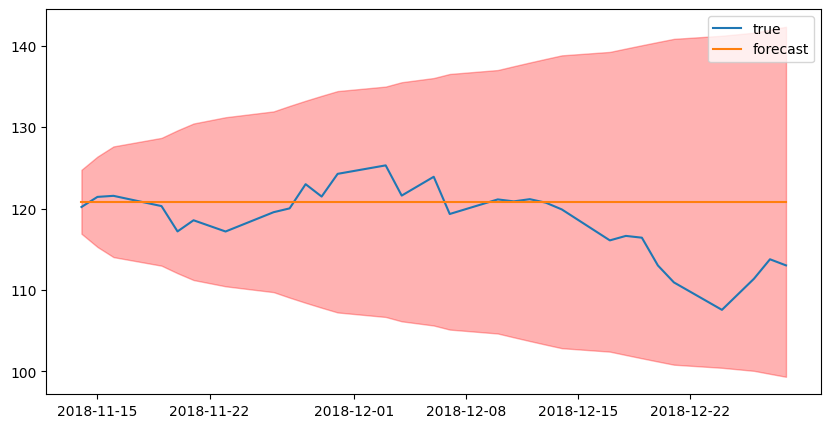

In [30]:

plot_test(model, test)

In [31]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: nan
RMSE Naive: 4.763157130051095


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


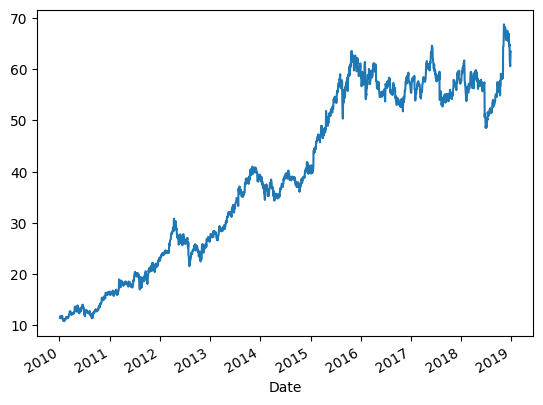

In [32]:
sbux = df[df['Name'] == 'SBUX']['Close']
# sbux = np.log(df[df['Name'] == 'SBUX']['Close'])
sbux.plot();

In [33]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]

In [34]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3858.919, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.632 seconds


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Tue, 18 Jul 2023   AIC                           3851.895
Time:                        13:24:40   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


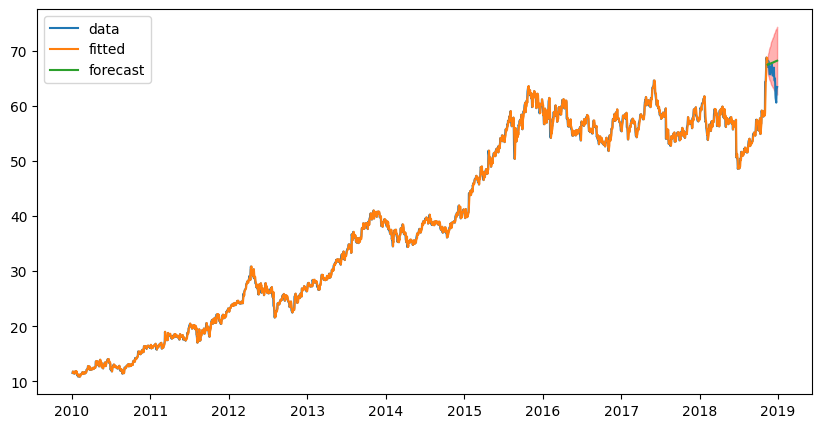

In [36]:
plot_result(model, sbux, train, test)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


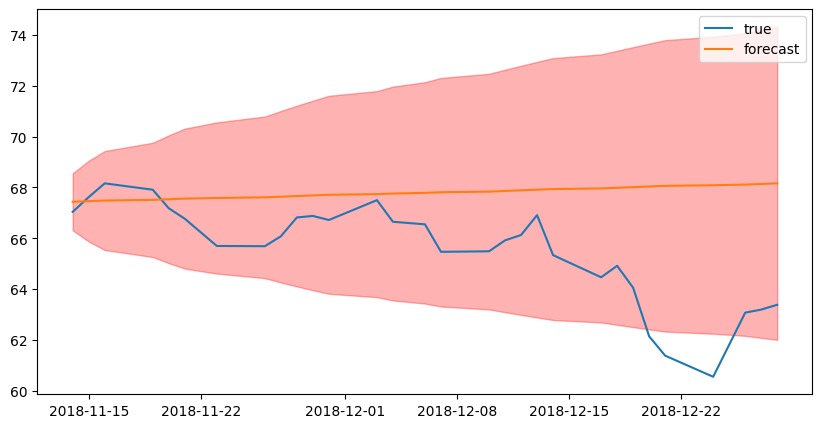

In [37]:
plot_test(model, test)

In [38]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: nan
RMSE Naive: 2.6889385763409135


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
